<a href="https://colab.research.google.com/github/beniciowg/data-science-projects/blob/master/Analisando_os_Dados_do_Airbnb_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - Roma

Fundado em 2008, o [Airbnb](https://www.airbnb.com.br/) já é considerado a maior empresa hoteleira da atualidade sem possuir um hotel sequer. O objetivo da empresa é conectar pessoas que desejam viajar e/ou que procuram algum lugar para se hospedar com anfitriões que desejam alugar seus imóveis.

A forma inovadora e disruptiva com que a *startup* entrou no mercado atraiu a atenção dos consumidores, possuindo quase 3 milhões de anfitriões cadastrados e já tendo hospedado, até março de 2019, mais de 500 milhões de pessoas.

Uma das iniciativas do Airbnb é disponibilizar dados do site em um portal chamado [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Nele é possível encontrar dados de hospedagem de algumas das cidades mais famosas do mundo, servindo como uma rica fonte para projetos e soluções de *Data Science*.

**Neste *notebook* iremos analisar os dados da cidade de Roma, mostrando como é possível obter insights de um *dataset* sem a necessidade de um modelo de grande complexidade. Isso será feito buscando responder algumas perguntas sobre a qualidade dos dados, o preço dos aluguéis e a quantidade mínima de noites para reservar um imóvel na cidade.** 

<center><img alt="Analisando Airbnb" width="25%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/1280px-Airbnb_Logo_B%C3%A9lo.svg.png"></center>



## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-04-29/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Ao iniciar uma análise, é de boa prática entender as principais variáveis e visualizar como é nosso *dataset*.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2737,"Single room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87218,12.48355,Private room,18,60,7,2015-05-28,0.11,5,365
1,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88826,12.47002,Private room,100,1,55,2017-10-31,0.39,3,365
2,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89503,12.49163,Entire home/apt,105,2,17,2018-10-01,0.15,6,365
3,11834,"Roma ""Charming Boschetto House""",44552,Serena,NaN,I Centro Storico,41.89574,12.49058,Entire home/apt,85,2,142,2020-01-03,1.29,1,345
4,12398,Casa Donatello - Home far from Home,11756,Gea,NaN,II Parioli/Nomentano,41.92584,12.46809,Entire home/apt,95,3,39,2015-07-19,0.34,1,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

# alterando last_review para tipo de data e verificando os tipos das variáveis
df['last_review'] = pd.to_datetime(df['last_review'])
display(df.dtypes)


Entradas: 31215
Variáveis: 16


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

Pode-se perceber que todas as variáveis estão com os tipos corretos e não há necessidade de fazer alterações nesse sentido para realização das análises.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Para compreender melhor a qualidade dos dados, é importante verificar a quantidade de valores nulos (células sem preenchimento) e a proporção deles em relação ao número total de entradas.

* A variável `neighbourhood_group` apresenta todas as entradas nulas, podendo ser excluída de nosso *dataset*.

* As principais varáveis como `price`, `neighbourhood`, `minimum_nights`, `longitude`, `latitude` e `room_type` não apresentam valores nulos.

* As variáveis `reviews_per_month` e `last_review` possuem próximo de 20% de valores nulos.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.197437
last_review                       0.197437
name                              0.000320
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Plotando histogramas das variáveis numéricas é possível verificar como é a distribuição de cada uma delas e identificar possíveis distorções e outliers.

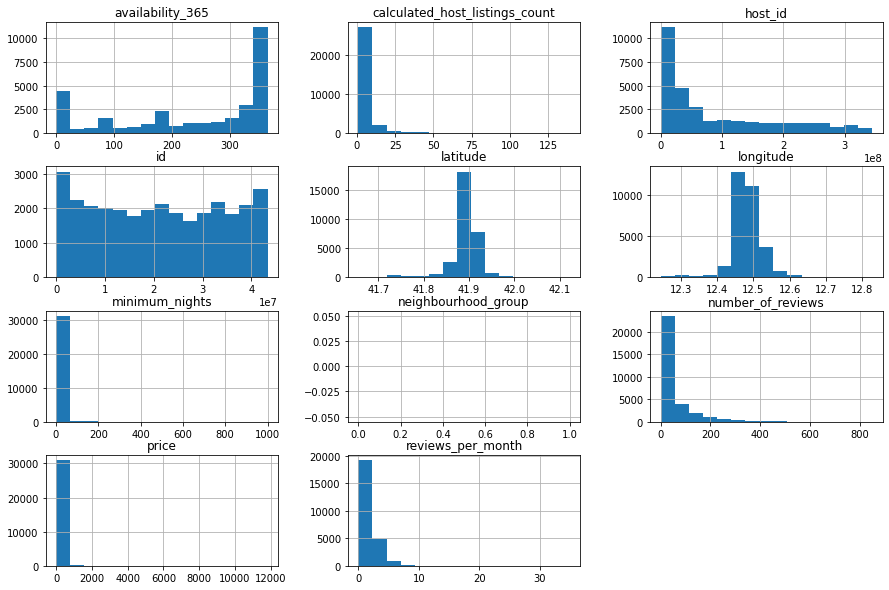

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**

Os histogramas indicam a presença de outliers nas variáveis de `price` e `minimum_nights`, distorcendo a representação gráfica. Para confirmar que os outliers estão presentes, há duas maneiras simples de verificar:

* Através de um resumo estatístico com o método `describe()`.
* Plotando `boxplots` para as variáveis numéricas.

In [7]:
# criar o resumo estatístico para as variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe() 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,31215.000000,31215.000000,31215.000000,25052.000000,31215.000000,31215.000000
mean,111.487041,3.080154,43.126862,1.460446,7.181643,235.998270
std,276.420392,15.307859,70.042274,1.518958,16.905015,132.775951
min,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.280000,1.000000,124.000000
50%,75.000000,2.000000,12.000000,0.930000,2.000000,293.000000
75%,115.000000,3.000000,55.000000,2.220000,6.000000,357.000000
max,11818.000000,1000.000000,850.000000,34.960000,139.000000,365.000000


Analisando o resumo estatístico acima, pode-se verificar algumas hipóteses:

* A variável `price` possui 75% de seus valores até 115, no entanto, seu valor máximo é de 11818, não sendo condizente com a realidade.
* A quantidade mínima de noites (`minimum_nights`) máxima está como 1000, ultrapassando os 365 dias de um ano.

A partir daqui, vamos filtrar os dados com valor máximo de 1000 para o preço e 30 para a quantidade mínima de noites.

#### Boxplot `price`


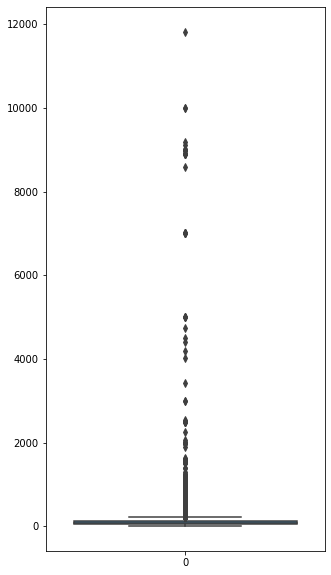


price: valores acima de 1000
387 entradas
1.2398%


In [8]:
# plotar o boxplot para a variável price
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=df['price'])

plt.show()

# verificar a quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print(f"{len(df[df.price > 500])} entradas")
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

Apesar de os valores acima de 1000 representarem somente 1.24% das entradas, são o suficiente para distorcer o nosso boxplot, impossibilitando a visualização da linha de mediana e dos quartis.

#### Boxplot `minimum_nights`


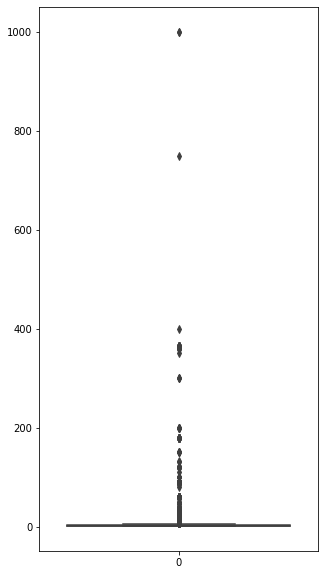


price: valores acima de 30
163 entradas
0.5222%


In [9]:
# plotar o boxplot para a variável minimum_nights
fig, ax = plt.subplots(figsize=(5,10))
sns.boxplot(data=df['minimum_nights'])

plt.show()

# verificar a quantidade de valores acima de 30 para minimum_nights
print("\nprice: valores acima de 30")
print(f"{len(df[df.minimum_nights > 30])} entradas")
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Assim como no boxplot anterior, os valores acima de 30 para `minimum_nights` são inferiores a 1%, mas são suficientes para distorcer nossa representação gráfica.

#### Histogramas sem *outliers*

Após identificarmos os outliers, podemos removê-los para evitar distorções nas análises e plotar os histogramas com os dados restantes.

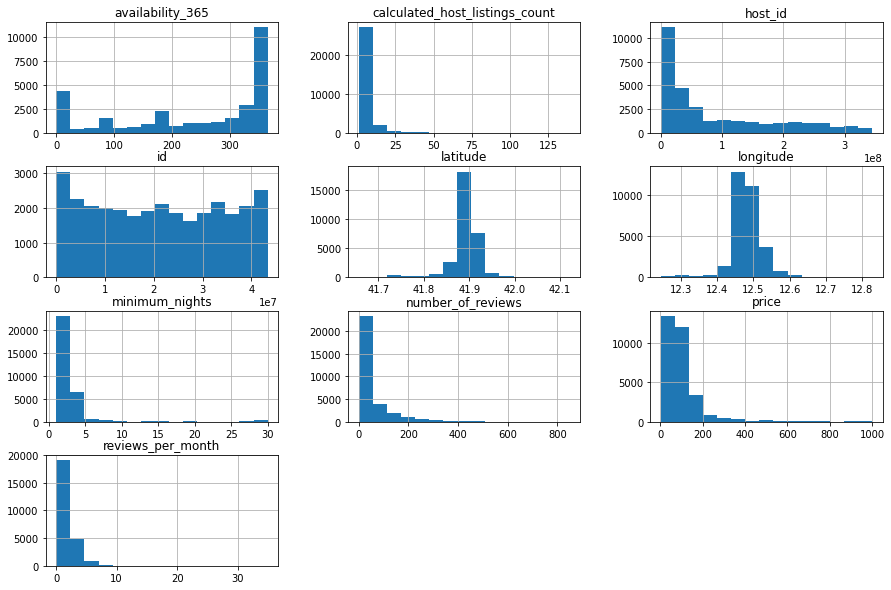

In [10]:
# criar uma cópia do dataset e remover os outliers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True);
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True);

# remover a coluna neighbourhood_group
df_clean.drop('neighbourhood_group', axis=1, inplace=True);

#plotar novamente os histogramas com os dados ajustados
df_clean.hist(bins=15, figsize=(15,10));

É nítida a diferença da visualização gráfica para ambas as variáveis. 

* Para a variável `price` é possível perceber que há uma grande concentração de valores até 200.
* Para a variável `minimum_nights` nota-se que a maior concentração de valores está entre 2 e 5.

### **Q5. Qual a correlação existente entre as variáveis**

Correlação implica na existência de uma relação entre duas coisas. Mais especificamente nesse caso, se há uma relação ou semelhança entre nossas variáveis.

Para medir a intensidade dessas relações podemos utilizar o coeficiente de correlação. Para mostrar os valores de correlação entre as variáveis existem duas maneiras mais comuns:

* Uma matriz de correlação.
* Criar um *heatmap* com essa matriz a partir da biblioteca `seaborn`.

In [20]:
# criar uma matriz de correlação
corr_Matrix = df_clean[['price', 'minimum_nights', 'number_of_reviews',
                        'reviews_per_month', 'calculated_host_listings_count',
                        'availability_365']].corr()

# mostrar a matriz de correlação
display(corr_Matrix)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.032800,-0.079718,-0.060323,0.112059,0.103831
minimum_nights,-0.032800,1.000000,-0.033784,-0.075497,-0.004426,-0.025257
number_of_reviews,-0.079718,-0.033784,1.000000,0.770014,-0.063824,0.101567
reviews_per_month,-0.060323,-0.075497,0.770014,1.000000,-0.052457,0.066663
calculated_host_listings_count,0.112059,-0.004426,-0.063824,-0.052457,1.000000,0.013512
availability_365,0.103831,-0.025257,0.101567,0.066663,0.013512,1.000000


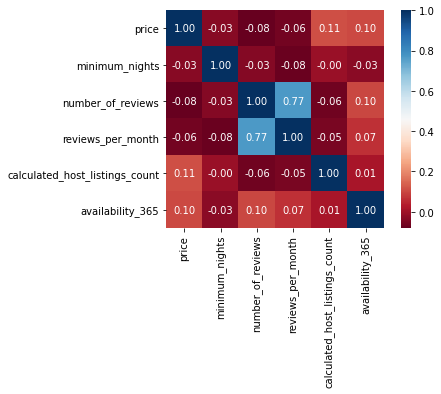

In [13]:
# plotar um heatmap a partir das correlações
sns.heatmap(data=corr_Matrix, cmap='RdBu', fmt='.2f', square=True, 
            linecolor='white', annot=True);


Analisando a matriz de correlação e o *heatmap* nota-se que não há uma correlação muito forte entre as variáveis analisadas, com exceção das variáveis `number_of_reviews` e `reviews_per_month`.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

É possível identificar também quais são os tipos de imóveis que são mais alugados. Como podemos imaginar, casas/apartamentos inteiros e quartos privativos são os tipos de imóveis disponibilizados em maior quantidade.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19971
Private room        9254
Hotel room          1489
Shared room          249
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.639789
Private room       0.296460
Hotel room         0.047701
Shared room        0.007977
Name: room_type, dtype: float64

### **Q7. Qual a média dos preços de aluguel?**

Calculando a média da variável `price` podemos descobrir o preço médio de uma diária em Roma.

In [11]:
# ver a média da coluna price
df_clean.price.mean()


101.00342344088105

### **Q8. Qual a localidade mais cara do dataset?**



Outro insight muito importante de se retirar desse *dataset* são os bairros que apresentam valores mais caros, provavelmente por estarem mais bem localizados e próximos aos pontos turísticos de destaque. Além disso, é importante nos certificarmos que esses bairros não possuem um número baixo de entradas e alta dispersão, passando uma falsa impressão de relevância. Podemos fazer isso das seguintes maneiras:

* Calculando o preço médio por bairro.
* Verificando o número de entradas (linhas) para os top 5 bairros.
* Plotando a `latitude` e `longitude` fornecidas para ver onde se encontra cada ponto.

In [16]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
I Centro Storico              124.836939
IX Eur                         94.946092
XIII Aurelia                   88.034534
XV Cassia/Flaminia             86.550877
II Parioli/Nomentano           83.931347
XII Monte Verde                77.708385
XIV Monte Mario                73.843137
X Ostia/Acilia                 69.922844
VIII Appia Antica              69.472540
VII San Giovanni/Cinecittà     68.897478
Name: price, dtype: float64

In [17]:
# verificar o número de entradas para cada um dos 5 bairros mais caros
print(df_clean[df_clean.neighbourhood == "I Centro Storico"].shape)
print(df_clean[df_clean.neighbourhood == "IX Eur"].shape)
print(df_clean[df_clean.neighbourhood == "XIII Aurelia"].shape)
print(df_clean[df_clean.neighbourhood == "XV Cassia/Flaminia"].shape)
print(df_clean[df_clean.neighbourhood == "II Parioli/Nomentano"].shape)

(16362, 15)
(371, 15)
(2027, 15)
(570, 15)
(2316, 15)


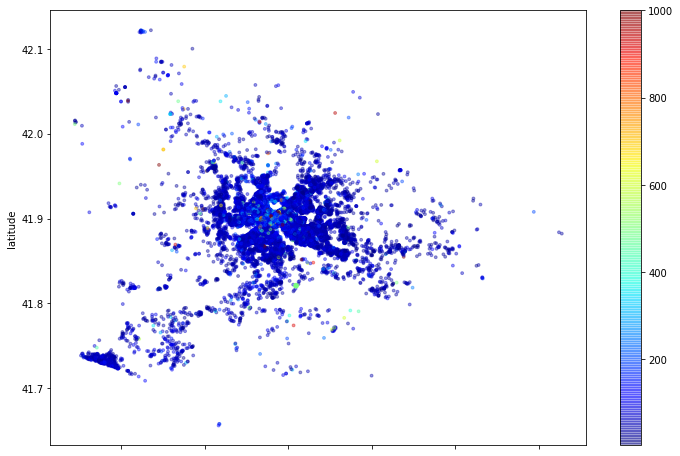

In [18]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Como esperado o centro histórico de Roma é o local de maior média de preço com um alto número de imóveis disponibilizados nessa região. Além disso, o bairro EUR onde se encontra um belo lago e um centreventos importante da cidade vem logo em seguida como o segundo bairro de maior preço. Pode-se notar também a concentração de pontos no plot de `latitude` e `longitude` na região central, em sua grande maioria azuis (faixa até 200 euros) respaldando o que foi observado antes no histograma.

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Por último, podemos observar também qual o número médio de noites mínimas para se alugar um imóvel na cidade. Como já havia sido indicado pelo histograma, esse valor fica em torno de 2.

In [19]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.31414914575461

## Conclusões


Com algumas linhas de código e um *dataset* relativamente simples, pudemos obter alguns insights.

Foi possível observar a presença de outliers em nossos dados que estavam causando distorções. Além disso, foi possível verificar quais os tipos de imóveis que são mais disponibilizados para locação, o número de noites mínimas para se reservar um imóvel na região e o preço médio do aluguel por bairro.

Por último, devemos lembrar que essa foi apenas uma abordagem inicial. Para análises mais complexas, construções de modelos de previsão e classificação é possível utilizar as bases mais completas disponibilizadas no site do [Inside Airbnb](http://insideairbnb.com/get-the-data.html). 